In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 데이터셋 준비
df = pd.read_csv('../data/SisFall_df_sc.csv')

X = []  # 입력 데이터
y = []  # 출력 데이터

# 4개의 레코드씩 묶어서 처리
for i in range(0, len(df) - 3, 4):
    # gx, gy, gz 값 가져오기
    gx_values = df.loc[i:i+3, 'scaled_gx'].values
    gy_values = df.loc[i:i+3, 'scaled_gy'].values
    gz_values = df.loc[i:i+3, 'scaled_gz'].values

    # 레이블 값 가져오기
    labels = df.loc[i:i+3, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X.append([gx_values, gy_values, gz_values])

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y.append(labels[0])

# 입력 데이터와 출력 데이터를 넘파이 배열로 변환
X = np.array(X)
y = np.array(y)

# 출력 데이터를 One-Hot 인코딩
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Transpose the input data
X = np.transpose(X, (0, 2, 1))  # Change the shape from (None, 3, 4) to (None, 4, 3)

# CNN-LSTM 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(4, 3)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=32)

# 모델 저장
model.save('../model/saved_model_cnn_lstm')

# 저장된 모델 로드
loaded_model = tf.keras.models.load_model('../model/saved_model_cnn_lstm')

Epoch 1/100
2590/2590 [==============================] - 10s 3ms/step - loss: 1.1303 - accuracy: 0.5383
Epoch 2/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.9825 - accuracy: 0.6051
Epoch 3/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.9458 - accuracy: 0.6217
Epoch 4/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.9234 - accuracy: 0.6284
Epoch 5/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.8838 - accuracy: 0.6462
Epoch 6/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.8390 - accuracy: 0.6595
Epoch 7/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.8225 - accuracy: 0.6646
Epoch 8/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.8121 - accuracy: 0.6694
Epoch 9/100
2590/2590 [==============================] - 8s 3ms/step - loss: 0.8059 - accuracy: 0.6705
Epoch 10/100
2590/2590 [==============================] - 8s 3ms/step - 

INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


In [56]:
import numpy as np

# 예측할 데이터 불러오기
pred_df = pd.read_csv('../data/Arduino/fall_sc.csv')

# 입력 데이터 준비
X_pred = []  # 입력 데이터

# 4개의 레코드씩 묶어서 처리
for i in range(0, len(pred_df) - 3, 4):
    # gx, gy, gz 값 가져오기
    gx_values = pred_df.loc[i:i+3, 'scaled_gx'].values
    gy_values = pred_df.loc[i:i+3, 'scaled_gy'].values
    gz_values = pred_df.loc[i:i+3, 'scaled_gz'].values

    # 데이터 형상 조정
    gx_values = np.expand_dims(gx_values, axis=-1)
    gy_values = np.expand_dims(gy_values, axis=-1)
    gz_values = np.expand_dims(gz_values, axis=-1)

    # 시퀀스로 변환하여 입력 데이터에 추가
    X_pred.append([gx_values, gy_values, gz_values])  # ConvLSTM2D 입력 형태에 맞게 조정

# 입력 데이터를 넘파이 배열로 변환
X_pred = np.array(X_pred)

# 입력 데이터 형태 수정
X_pred = np.transpose(X_pred, (0, 2, 1, 3))

# 예측
predictions = loaded_model.predict(X_pred)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# 예측 결과 출력
print(predicted_classes)

2/2 [==============================] - 0s 2ms/step
['stairs_walking' 'fall' 'stairs_walking' 'stairs_walking'
 'stairs_walking' 'fall' 'fall' 'fall' 'stairs_walking' 'stairs_walking'
 'stairs_walking' 'fall' 'fall' 'fall' 'fall' 'fall' 'fall' 'fall'
 'stairs_walking' 'stairs_walking' 'jogging' 'fall' 'stairs_walking'
 'stairs_walking' 'fall' 'fall' 'fall' 'fall' 'fall' 'fall'
 'stairs_walking' 'stairs_walking' 'stairs_walking' 'jogging' 'fall'
 'jogging' 'fall' 'fall' 'stairs_walking' 'fall' 'fall' 'stairs_walking'
 'jogging' 'fall' 'fall' 'stairs_walking' 'fall' 'fall' 'fall' 'fall']


In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 데이터셋 준비
df = pd.read_csv('../data/SisFall_df_sc.csv')

X = []  # 입력 데이터
y = []  # 출력 데이터

# 40개의 레코드씩 묶어서 처리
for i in range(0, len(df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = df.loc[i:i+39, 'scaled_gx'].values
    gy_values = df.loc[i:i+39, 'scaled_gy'].values
    gz_values = df.loc[i:i+39, 'scaled_gz'].values

    # 레이블 값 가져오기
    labels = df.loc[i:i+39, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X.append([gx_values, gy_values, gz_values])

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y.append(labels[0])

# 입력 데이터와 출력 데이터를 넘파이 배열로 변환
X = np.array(X)
y = np.array(y)

# 출력 데이터를 One-Hot 인코딩
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Transpose the input data
X = np.transpose(X, (0, 2, 1))  # Change the shape from (None, 3, 40) to (None, 40, 3)

# CNN-LSTM 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(40, 3)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=32)

# 모델 저장
model.save('../model/saved_model_cnn_lstm')

# 저장된 모델 로드
loaded_model = tf.keras.models.load_model('../model/saved_model_cnn_lstm')

Epoch 1/100
256/256 [==============================] - 11s 34ms/step - loss: 1.0596 - accuracy: 0.5307
Epoch 2/100
256/256 [==============================] - 9s 34ms/step - loss: 0.8732 - accuracy: 0.6318
Epoch 3/100
256/256 [==============================] - 9s 34ms/step - loss: 0.8275 - accuracy: 0.6660
Epoch 4/100
256/256 [==============================] - 9s 34ms/step - loss: 0.7857 - accuracy: 0.6846
Epoch 5/100
256/256 [==============================] - 9s 34ms/step - loss: 0.7208 - accuracy: 0.7198
Epoch 6/100
256/256 [==============================] - 9s 34ms/step - loss: 0.6797 - accuracy: 0.7330
Epoch 7/100
256/256 [==============================] - 9s 34ms/step - loss: 0.6411 - accuracy: 0.7464
Epoch 8/100
256/256 [==============================] - 9s 34ms/step - loss: 0.6075 - accuracy: 0.7619
Epoch 9/100
256/256 [==============================] - 9s 34ms/step - loss: 0.5897 - accuracy: 0.7638
Epoch 10/100
256/256 [==============================] - 9s 34ms/step - loss: 0.56

INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


In [58]:
import numpy as np

# 예측할 데이터 불러오기
pred_df = pd.read_csv('../data/Arduino/fall_sc.csv')

# 입력 데이터 준비
X_pred = []  # 입력 데이터

# 40개의 레코드씩 묶어서 처리
for i in range(0, len(pred_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = pred_df.loc[i:i+39, 'scaled_gx'].values
    gy_values = pred_df.loc[i:i+39, 'scaled_gy'].values
    gz_values = pred_df.loc[i:i+39, 'scaled_gz'].values

    # 데이터 형상 조정
    gx_values = np.expand_dims(gx_values, axis=-1)
    gy_values = np.expand_dims(gy_values, axis=-1)
    gz_values = np.expand_dims(gz_values, axis=-1)

    # 시퀀스로 변환하여 입력 데이터에 추가
    X_pred.append([gx_values, gy_values, gz_values])  # ConvLSTM2D 입력 형태에 맞게 조정

# 입력 데이터를 넘파이 배열로 변환
X_pred = np.array(X_pred)

# 입력 데이터 형태 수정
X_pred = np.transpose(X_pred, (0, 2, 1, 3))

# 예측
predictions = loaded_model.predict(X_pred)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# 예측 결과 출력
print(predicted_classes)

1/1 [==============================] - 0s 456ms/step
['stairs_walking' 'stairs_walking' 'fall' 'stairs_walking' 'fall']


In [59]:
import numpy as np

# 예측할 데이터 불러오기
pred_df = pd.read_csv('../data/Arduino/walking_sc.csv')

# 입력 데이터 준비
X_pred = []  # 입력 데이터

# 40개의 레코드씩 묶어서 처리
for i in range(0, len(pred_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = pred_df.loc[i:i+39, 'scaled_gx'].values
    gy_values = pred_df.loc[i:i+39, 'scaled_gy'].values
    gz_values = pred_df.loc[i:i+39, 'scaled_gz'].values

    # 데이터 형상 조정
    gx_values = np.expand_dims(gx_values, axis=-1)
    gy_values = np.expand_dims(gy_values, axis=-1)
    gz_values = np.expand_dims(gz_values, axis=-1)

    # 시퀀스로 변환하여 입력 데이터에 추가
    X_pred.append([gx_values, gy_values, gz_values])  # ConvLSTM2D 입력 형태에 맞게 조정

# 입력 데이터를 넘파이 배열로 변환
X_pred = np.array(X_pred)

# 입력 데이터 형태 수정
X_pred = np.transpose(X_pred, (0, 2, 1, 3))

# 예측
predictions = loaded_model.predict(X_pred)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# 예측 결과 출력
print(predicted_classes)

1/1 [==============================] - 0s 27ms/step
['jogging' 'jogging' 'jogging' 'fall' 'fall' 'fall' 'stairs_walking'
 'fall' 'stairs_walking' 'stairs_walking']


In [60]:
import numpy as np

# 예측할 데이터 불러오기
pred_df = pd.read_csv('../data/Arduino/standing_sc.csv')

# 입력 데이터 준비
X_pred = []  # 입력 데이터

# 40개의 레코드씩 묶어서 처리
for i in range(0, len(pred_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = pred_df.loc[i:i+39, 'scaled_gx'].values
    gy_values = pred_df.loc[i:i+39, 'scaled_gy'].values
    gz_values = pred_df.loc[i:i+39, 'scaled_gz'].values

    # 데이터 형상 조정
    gx_values = np.expand_dims(gx_values, axis=-1)
    gy_values = np.expand_dims(gy_values, axis=-1)
    gz_values = np.expand_dims(gz_values, axis=-1)

    # 시퀀스로 변환하여 입력 데이터에 추가
    X_pred.append([gx_values, gy_values, gz_values])  # ConvLSTM2D 입력 형태에 맞게 조정

# 입력 데이터를 넘파이 배열로 변환
X_pred = np.array(X_pred)

# 입력 데이터 형태 수정
X_pred = np.transpose(X_pred, (0, 2, 1, 3))

# 예측
predictions = loaded_model.predict(X_pred)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# 예측 결과 출력
print(predicted_classes)

1/1 [==============================] - 0s 21ms/step
['stairs_walking' 'stairs_walking' 'fall' 'stairs_walking'
 'stairs_walking' 'stairs_walking']


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 데이터셋 준비
train_df = pd.read_csv('../data/SisFall_train.csv')  # 훈련 파일
test_df = pd.read_csv('../data/SisFall_test.csv')  # 테스트 파일

X_train = []  # 훈련 입력 데이터
y_train = []  # 훈련 출력 데이터

X_test = []  # 테스트 입력 데이터
y_test = []  # 테스트 출력 데이터

# 4개의 레코드씩 묶어서 처리
for i in range(0, len(train_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = train_df.loc[i:i+39, 'gx'].values
    gy_values = train_df.loc[i:i+39, 'gy'].values
    gz_values = train_df.loc[i:i+39, 'gz'].values

    # 레이블 값 가져오기
    labels = train_df.loc[i:i+39, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X_train.append(np.transpose([gx_values, gy_values, gz_values]))

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y_train.append(labels[0])

for i in range(0, len(test_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = test_df.loc[i:i+39, 'gx'].values
    gy_values = test_df.loc[i:i+39, 'gy'].values
    gz_values = test_df.loc[i:i+39, 'gz'].values

    # 레이블 값 가져오기
    labels = test_df.loc[i:i+39, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X_test.append(np.transpose([gx_values, gy_values, gz_values]))

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y_test.append(labels[0])

# 입력 데이터와 출력 데이터를 넘파이 배열로 변환
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# 출력 데이터를 One-Hot 인코딩
label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(y_train)
integer_encoded_train = integer_encoded_train.reshape(len(integer_encoded_train), 1)
onehot_encoder_train = OneHotEncoder(sparse_output=False)
y_train = onehot_encoder_train.fit_transform(integer_encoded_train)

integer_encoded_test = label_encoder.transform(y_test)
integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
onehot_encoder_test = OneHotEncoder(sparse_output=False)
y_test = onehot_encoder_test.fit_transform(integer_encoded_test)

# CNN-LSTM 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(40, 3)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 모델 저장
model.save('../model/saved_model_cnn_lstm')

Epoch 1/30
174/174 [==============================] - 4s 13ms/step - loss: 0.6601 - accuracy: 0.7405 - val_loss: 0.5365 - val_accuracy: 0.7932
Epoch 2/30
174/174 [==============================] - 2s 9ms/step - loss: 0.4218 - accuracy: 0.8291 - val_loss: 0.4669 - val_accuracy: 0.8176
Epoch 3/30
174/174 [==============================] - 2s 9ms/step - loss: 0.3597 - accuracy: 0.8594 - val_loss: 0.4113 - val_accuracy: 0.8351
Epoch 4/30
174/174 [==============================] - 2s 9ms/step - loss: 0.3211 - accuracy: 0.8705 - val_loss: 0.3713 - val_accuracy: 0.8463
Epoch 5/30
174/174 [==============================] - 2s 9ms/step - loss: 0.2739 - accuracy: 0.8900 - val_loss: 0.3547 - val_accuracy: 0.8581
Epoch 6/30
174/174 [==============================] - 2s 9ms/step - loss: 0.2450 - accuracy: 0.9070 - val_loss: 0.3209 - val_accuracy: 0.8798
Epoch 7/30
174/174 [==============================] - 2s 9ms/step - loss: 0.2158 - accuracy: 0.9122 - val_loss: 0.3081 - val_accuracy: 0.8826
Epoch

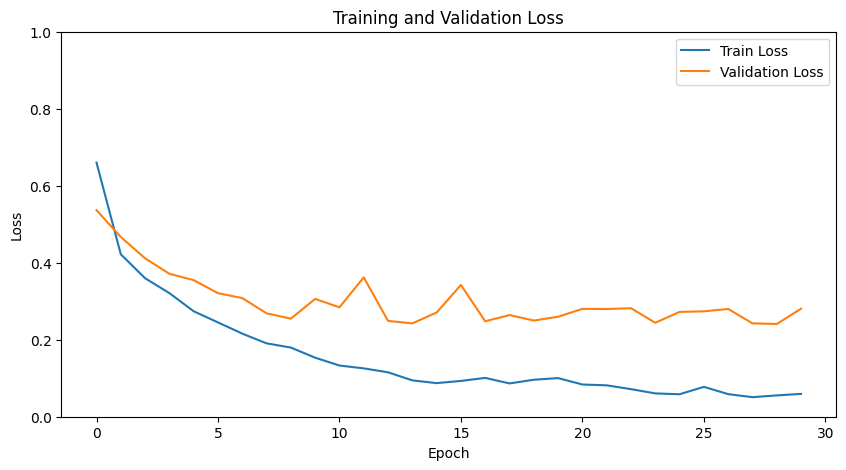

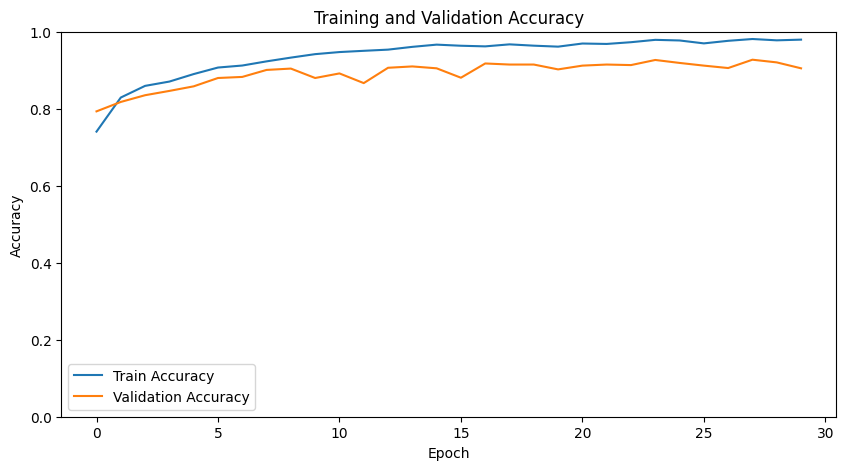

In [2]:
import matplotlib.pyplot as plt

# Get the training history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()